# 2.1 $\quad$ Generación de carteras

## 1. Rentabilidad y volatilidad de una cartera con dos activos

Una **cartera** de activos define una colección de activos financieros, como acciones, bonos y otros instrumentos de inversión. La composición de la cartera se determina con el **objetivo** de alcanzar una meta financiera específica, como maximizar el rendimiento, minimizar el riesgo o encontrar cierto equilibrio entre ambos. La **gestión** de carteras implica la toma de decisiones estratégicas sobre la asignación de activos, la diversificación y el ajuste periódico para adaptarse a los posibles cambios en las condiciones del mercado.

Definir una cartera de activos implica especificar los diferentes instrumentos financieros o activos que la componen y la proporción en la que se invierte en cada uno. Si llamamos:

* $w_1$ a la proporción de la inversión en el activo $1$ $\Rightarrow w_2=1-w_1$. Debe cumplirse que $w_1 + w_2 = 1.0$ ya que representa el 100% de la inversión.

* $\bar R_p$ a la rentabilidad media o esperanza de la cartera $\Rightarrow \bar R_p=w_1 \bar R_1 + w_2 \bar R_2$. Es una suma ponderada de la rentabilidad de cada activo por el porcentaje de inversión $w_i$ en cada activo.

* Varianza $\sigma_{P}^2 = w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \sigma_{12}$ siendo $\sigma_{12}$, la covarianza entre los activos 1 y 2. Es decir, la varianza de la cartera se ve afectada por las covarianzas ($\sigma_{12}$) entre los activos.

* Volatilidad $\sigma_{P} = \sqrt{\sigma_{P}^2}$

Operando un poco y poniendo la Covarianza en función de la Correlación:

$\sigma_{P}^2 = w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \sigma_{12}$ donde $\sigma_{12} = Cov(r_1,r_2)$

Si:

$Corr(r_1,r_2) = \frac{Cov(r_1,r_2)}{\sigma_{r_1}\sigma_{r_2}} \implies Cov(r_1,r_2) = \sigma_{r_1}\sigma_{r_2} Corr(r_1,r_2) = \sigma_1\sigma_2\rho_{12}$

Por lo tanto:

$\sigma_{P}^2 = w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \sigma_1\sigma_2 \rho_{12} \implies \sigma_{P} = \sqrt{w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \sigma_1\sigma_2 \rho_{12}}$

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Definimos dos funciones:

* **calc_ret_cartera** una función que, dada una cartera, nos devuelve la rentabilidad esperada

* **calc_std_cartera** una función que, dada una cartera, nos devuelve la varianza de la cartera

* una cartera ejemplo con dos activos: **cartera**

In [43]:
def calc_ret_cartera(w1: float, w2: float, r1: float, r2: float) -> float:
    """Calcula el retorno esperado de una cartera con dos activos.

    Args:
        w1 (float): Peso del activo 1 en la cartera.
        w2 (float): Peso del activo 2 en la cartera.
        r1 (float): Retorno esperada del activo 1.
        r2 (float): Retorno esperada del activo 2.

    Returns:
        float: Retorno esperado de la cartera.
    """

    return w1 * r1 + w2 * r2

In [44]:
def calc_std_cartera(
    w1: float, w2: float, std1: float, std2: float, rho: float
) -> float:
    """Calcula la desviación estándar de una cartera con dos activos.
    Args:
        w1 (float): Peso del activo 1 en la cartera.
        w2 (float): Peso del activo 2 en la cartera.
        std1 (float): Desviación estándar del activo 1.
        std2 (float): Desviación estándar del activo 2.
        rho (float): Coeficiente de correlación entre los activos.
    Returns:
        float: Desviación estándar de la cartera.
    """

    return np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * std1 * std2 * rho)

In [45]:
# definimos una cartera con dos activos
ret1 = 0.2  # retornos esperados del activo 1
ret2 = 0.1  # retornos esperados del activo 2

std1 = 0.25  # volatilidad del activo 1
std2 = 0.15  # volatilidad del activo 2

p1 = 0.4  # peso del activo 1
p2 = 0.6  # peso del activo 2

---

### Caso 1:  
$\quad \rho_{12} = 1$

* Si $\rho_{12} = 1$ se dice que los activos son **perfecta y positivamente** correlacionados.

    - No hay beneficios de diversificación.

    - La rentabilidad de la cartera es igual a la suma ponderada de las rentabilidades de los activos.
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$

    - La volatilidad de la cartera es igual a la suma ponderada de las volatilidades de los activos.
        
        Si $\rho_{12} = 1$

        $\sigma_{P} = \sqrt{w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \sigma_1\sigma_2 \rho_{12}} = \sqrt{w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \sigma_1\sigma_2} = \sqrt{(w_1\sigma_{1})^2 + (w_2\sigma_{2})^2 + 2(w_1\sigma_1)(w_2\sigma_2)}$

        Si $(x+y)^2 = 2x+2y+2xy$

        $\sigma_P = w_1 \sigma_1 + w_2 \sigma_2$

In [46]:
# definimos el coeficiente de correlación
coef_corr = 1

In [47]:
print(f"El retorno de la cartera es: {100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %")
print(
    f"La volatilidad de la cartera es: {100*calc_std_cartera(p1, p2, std1, std2, coef_corr):.2f} %"
)

El retorno de la cartera es: 14.00 %
La volatilidad de la cartera es: 19.00 %


Vamos a ir variando los pesos de los dos activos y ver cómo se comporta la rentabilidad y la volatilidad de la cartera.

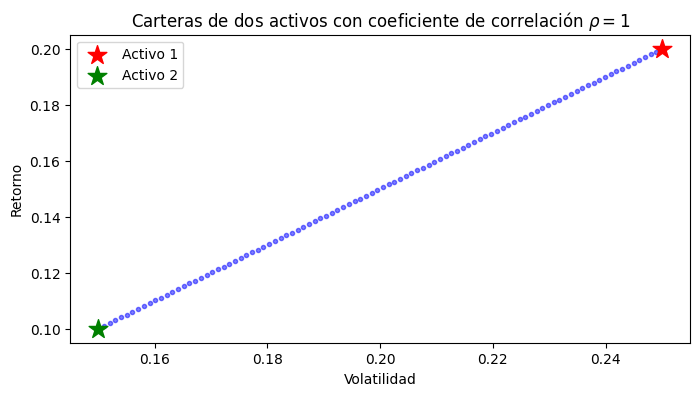

In [48]:
fig, ax = plt.subplots(figsize=(8, 4))

pesos_1 = np.linspace(
    0, 1, 100
)  # generamos 100 puntos entre 0 y 1 que representan los pesos_1 del activo 1

for w_1 in pesos_1:
    w_2 = 1 - w_1  # calculamos el peso del activo 2

    ret_p = calc_ret_cartera(
        w_1, w_2, ret1, ret2
    )  # calculamos el retorno de la cartera para cada peso
    std_p = calc_std_cartera(
        w_1, w_2, std1, std2, coef_corr
    )  # calculamos la volatilidad de la cartera para cada peso

    plt.scatter(
        x=std_p, y=ret_p, marker=".", color="blue", alpha=0.5
    )  # marcamos el punto

plt.scatter(
    x=std1, y=ret1, color="red", marker="*", s=200, label="Activo 1"
)  # marcamos el punto del activo 1
plt.scatter(
    x=std2, y=ret2, color="green", marker="*", s=200, label="Activo 2"
)  # marcamos el punto del activo 2

plt.xlabel("Volatilidad")
plt.ylabel("Retorno")
plt.title(r"Carteras de dos activos con coeficiente de correlación $\rho=1$")
plt.legend()
plt.show()

---

Vamos a construir carteras a partir de las rentabilidades de dos activos que descargamos.

In [82]:
# Para descargar desde github

file_path = "https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python/refs/heads/Feb-2025/Tema_1_Activos_Intro/data/precios_corr_pos.csv"
precios_pos_df = pd.read_csv(file_path, index_col=0, parse_dates=True)
precios_pos_df.head()

,Activo 1,Activo 2
2010-01-04,117.000000,158.000000
2010-01-05,113.192375,156.263037
2010-01-06,111.121152,155.307702
2010-01-07,107.084666,153.467719
2010-01-08,105.076790,152.540900


In [83]:
# Descargar los precios de los activos
precios_pos_df = pd.read_csv(
    "../data/precios_corr_pos.csv", index_col=0, parse_dates=True
)
precios_pos_df.head()

,Activo 1,Activo 2
2010-01-04,117.000000,158.000000
2010-01-05,113.192375,156.263037
2010-01-06,111.121152,155.307702
2010-01-07,107.084666,153.467719
2010-01-08,105.076790,152.540900


In [51]:
# Calcular los retornos logarítmicos de los precios
retornos_pos_df = np.log(precios_pos_df).diff().dropna()

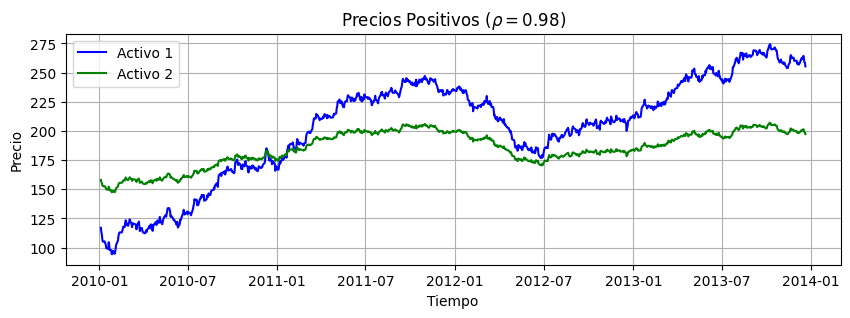

In [52]:
# Graficar precios_pos_df y mostrar coeficiente de correlación en el título
plt.figure(figsize=(10, 3))

corr_pos = retornos_pos_df.corr().iloc[0, 1]

plt.plot(precios_pos_df["Activo 1"], label="Activo 1", color="blue")
plt.plot(precios_pos_df["Activo 2"], label="Activo 2", color="green")

# plt.title(f"Precios Positivos (Correlación de los retornos: {corr_pos:.2f})")
plt.title(f"Precios Positivos ($\\rho={corr_pos:.2f}$)")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.show()

Como se ve en la figura, tener una **correlación positiva** implica que cuando un activo sube, el otro también sube y viceversa, es decir, están altamente correlados positivamente. 

El cálculo de los parámetros (rentabilidad y volatilidad) de carteras con datos reales cuando disponemos de los precios o retornos diarios/semanales/etc. se puede realizar de dos maneras distintas:

* Utilizando las ecuaciones anteriores
* Considerando la cartera como un único activo

#### Utilizando las ecuaciones anteriores

Es necesario calcular la media y volatilidad de los retornos y la correlación entre los dos activos.

In [53]:
# Calcular la media y la desviación estándar de los retornos
med_pos = retornos_pos_df.mean()
std_pos = retornos_pos_df.std()

med_pos, std_pos

(Activo 1    0.000781
 Activo 2    0.000222
 dtype: float64,
 Activo 1    0.011965
 Activo 2    0.005326
 dtype: float64)

In [54]:
# Calcular la matriz de correlación de los dos activos
matriz_correlacion = retornos_pos_df.corr()
rho = matriz_correlacion.values[0, 1]

rho

np.float64(0.9801402288728873)

In [55]:
# Definimos los pesos de la cartera
w1 = 0.8
w2 = 0.2

In [56]:
# Calculamos la rentabilidad de la cartera
r1 = med_pos.iloc[0]
r2 = med_pos.iloc[1]

print("La rentabilidad de la cartera es:", calc_ret_cartera(w1, w2, r1, r2))

La rentabilidad de la cartera es: 0.0006692986940257982


In [57]:
# Calculamos la volatilidad de la cartera
vol1 = std_pos.iloc[0]
vol2 = std_pos.iloc[1]

print("La volatilidad de la cartera es:", calc_std_cartera(w1, w2, vol1, vol2, rho))

La volatilidad de la cartera es: 0.010618201150274205


#### Considerando la cartera como un único activo

Con los retornos diarios de cada activo y los pesos de la cartera, podemos calcular los retornos diarios de la cartera. A partir de ahí, podemos considerar dicha cartera como un único activo y calcular su retorno y volatilidad.

In [58]:
retornos_pos_df.shape

(999, 2)

In [59]:
# Cálculo de los retornos diarios de la cartera
pesos = np.array([w1, w2])  # (1, 2)

retornos_cartera = retornos_pos_df @ pesos.T  # (999, 2) @ (2, 1) = (999, 1)

retornos_cartera

2010-01-05   -0.028679
2010-01-06   -0.016001
2010-01-07   -0.031985
2010-01-08   -0.016354
2010-01-11    0.002600
                ...   
2013-12-16    0.010026
2013-12-17   -0.010063
2013-12-18   -0.009953
2013-12-19   -0.001246
2013-12-20   -0.010755
Length: 999, dtype: float64

In [60]:
print("La rentabilidad de la cartera es:", retornos_cartera.mean())

# La rentabilidad de la cartera es: 0.0006692986940257982

La rentabilidad de la cartera es: 0.0006692986940257981


In [61]:
print("La volatilidad de la cartera es:", retornos_cartera.std())

# La volatilidad de la cartera es: 0.010618201150274205

La volatilidad de la cartera es: 0.010618201150274204


---

Vamos a generar 1000 carteras aleatorias y a representarlas gráficamente.

In [62]:
# Generador de números aleatorios.
rng = np.random.default_rng(42)  # Fijar semilla para reproducibilidad

# Generar pesos aleatorios.
num_portfolios = 1000

weights = rng.random(
    size=(num_portfolios, 2)
)  # Distribución uniforme entre 0 y 1 -> [0.0, 1.0)
weights = weights / np.sum(
    weights, axis=1, keepdims=True
)  # Normalizar para que la suma sea 1

weights.shape

(1000, 2)

In [63]:
def asset_performance(returns: pd.Series) -> tuple:
    """Calcula la rentabilidad y el riesgo de un activo individual.

    Args:
        returns (pd.Series): Serie de tiempo con los retornos del activo.

    Returns:
        tuple: Retorno esperado y desviación estándar de los retornos.
    """

    r_a = returns.mean()
    std_a = returns.std()

    return r_a, std_a

In [64]:
def portfolio_performance(weights: np.ndarray, returns: pd.DataFrame) -> tuple:
    """Calcula la rentabilidad y el riesgo de una cartera a partir de los pesos y los retornos de los activos.

    Args:
        weights (np.ndarray): Peso de cada activo en la cartera.
        returns (pd.DataFrame): Serie de tiempo con los retornos de los activos.

    Returns:
        tuple: Retorno esperado y desviación estándar de los retornos de la cartera.
    """

    portfolio_returns = returns @ weights.T

    r_p = portfolio_returns.mean(axis=0)
    std_p = portfolio_returns.std(axis=0)

    return r_p, std_p

In [65]:
# Función para graficar en un eje específico
def plot_on_axis(
    ret_mean: float,
    ret_std: float,
    asset1_mean: float,
    asset1_std: float,
    asset2_mean: float,
    asset2_std: float,
    color: str,
    marker: str,
    title: str,
    corr: float,
):
    # Inicializar figura y ejes
    plt.figure(figsize=(14, 4))

    plt.scatter(ret_std, ret_mean, c=color, marker=marker, alpha=0.4, label=None)
    plt.scatter(asset1_std, asset1_mean, c="red", marker="*", s=150, label="Activo 1")
    plt.scatter(asset2_std, asset2_mean, c="green", marker="*", s=150, label="Activo 2")

    # plt.plot([asset1_std, asset2_std], [asset1_mean, asset2_mean], color="red", linestyle="--")

    plt.title(f"{title} ($\\rho={corr:.2f}$)")
    plt.xlabel("Riesgo (Desviación Estándar)")
    plt.ylabel("Rentabilidad (Retorno Medio)")
    plt.legend(loc="upper left")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

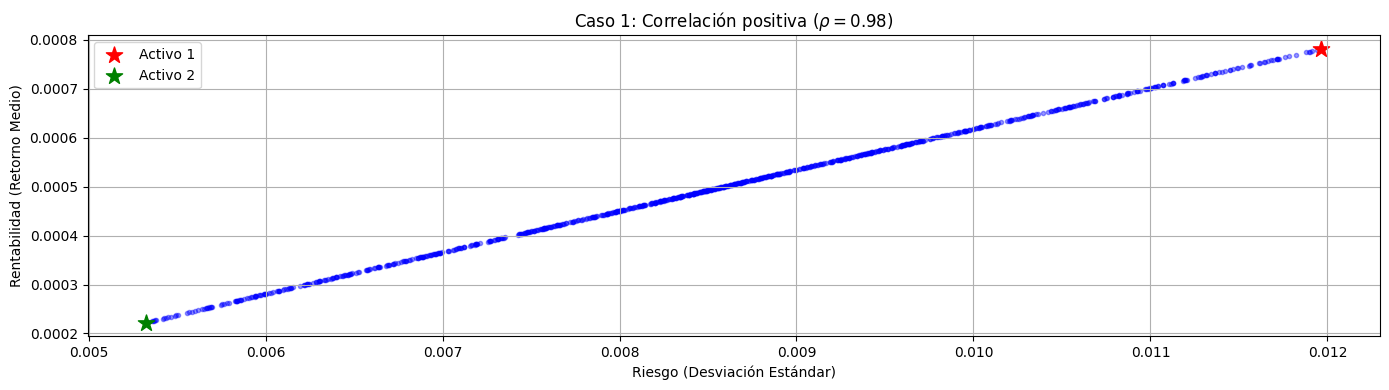

In [66]:
# Rentabilidad esperada y riesgo activo 1.
asset1_pos_mean, asset1_pos_std = asset_performance(retornos_pos_df["Activo 1"])
# Rentabilidad esperada y riesgo activo 2.
asset2_pos_mean, asset2_pos_std = asset_performance(retornos_pos_df["Activo 2"])
# Rentabilidades esperadas y riesgos de todas las carteras calculadas.
ret_pos_mean, ret_pos_std = portfolio_performance(
    weights, retornos_pos_df
)  # weights.shape = (1000, 2)

# Graficar
plot_on_axis(
    ret_pos_mean,
    ret_pos_std,
    asset1_pos_mean,
    asset1_pos_std,
    asset2_pos_mean,
    asset2_pos_std,
    "blue",
    ".",
    "Caso 1: Correlación positiva",
    corr_pos,
)

---

### Caso 2:  
$\quad \rho_{12} = -1$

* Si $\rho_{12} = -1$ se dice que los activos son **perfecta pero negativamente** correlacionados.

    - Hay máximos beneficios de diversificación.

    - La rentabilidad de la cartera es igual (recordad que **no depende de las relaccciones entre activos**).
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$
        

    - La volatilidad de la cartera es igual a la suma ponderada de las volatilidades de los activos.
        
        Si $\rho_{12} = -1$

        $\sigma_{P} = \sqrt{w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \sigma_1\sigma_2 \rho_{12}} = \sqrt{w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 - 2 w_1 w_2 \sigma_1\sigma_2} = \sqrt{(w_1\sigma_{1})^2 + (w_2\sigma_{2})^2 - 2(w_1\sigma_1)(w_2\sigma_2)}$

        Si $(x-y)^2 = 2x+2y-2xy$

        $\sigma_P = |w_1 \sigma_1 - w_2 \sigma_2|$ <span style="color: orange;">OJO: valor absoluto porque el resultado debe ser positivo</span>


In [67]:
# definimos el coeficiente de correlación
coef_corr_neg = -1

In [68]:
print(p1, ret1, std1)
print(p2, ret2, std2)

0.4 0.2 0.25
0.6 0.1 0.15


In [69]:
# calculamos la rentabilidad y volatilidad de la cartera con el nuevo coeficiente de correlación
print(f"El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %")
print(
    f"La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, coef_corr_neg):.2f} %"
)

El retorno de la cartera es:14.00 %
La volatilidad de la cartera es:1.00 %


Recordad que con $\rho_{12}=1$ nos dió:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 19$%

y con el $\rho_{12}=-1$ y nos ha dado:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 1$%

Gracias a la **diversificación**, obtenemos la misma rentabilidad pero **menor volatilidad**.

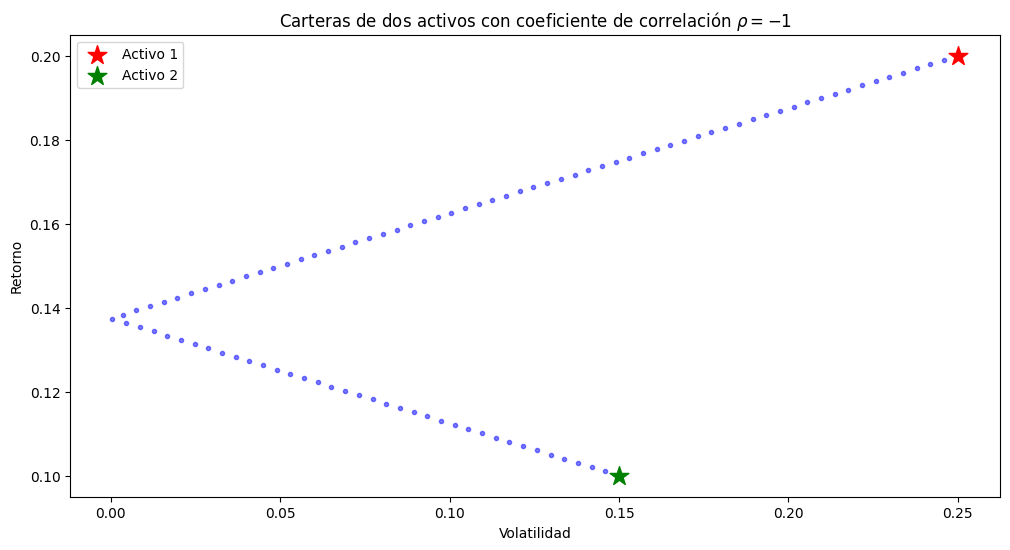

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

pesos_1 = np.linspace(
    0, 1, 100
)  # generamos 100 puntos entre 0 y 1 que representan los pesos_1 del activo 1

for w_1 in pesos_1:
    w_2 = 1 - w_1  # calculamos el peso del activo 2

    ret_p = calc_ret_cartera(
        w_1, w_2, ret1, ret2
    )  # calculamos el retorno de la cartera para cada peso
    std_p = calc_std_cartera(
        w_1, w_2, std1, std2, coef_corr_neg
    )  # calculamos la volatilidad de la cartera para cada peso

    plt.scatter(
        x=std_p, y=ret_p, marker=".", color="blue", alpha=0.5
    )  # marcamos el punto

plt.scatter(
    std1, ret1, color="red", marker="*", s=200, label="Activo 1"
)  # marcamos el punto del activo 1
plt.scatter(
    std2, ret2, color="green", marker="*", s=200, label="Activo 2"
)  # marcamos el punto del activo 2

plt.xlabel("Volatilidad")
plt.ylabel("Retorno")
plt.title(r"Carteras de dos activos con coeficiente de correlación $\rho=-1$")
plt.legend()
plt.show()

---

Vamos a construir carteras a partir de las rentabilidades de dos activos que descargamos.

In [ ]:
file_path = "https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python/refs/heads/Feb-2025/Tema_1_Activos_Intro/data/precios_corr_neg.csv"
precios_neg_df = pd.read_csv(file_path, index_col=0, parse_dates=True)
precios_neg_df.head()

,Activo 1,Activo 2
2010-01-04,117.000000,158.000000
2010-01-05,113.169161,159.774582
2010-01-06,111.074723,160.767536
2010-01-07,107.015024,162.645138
2010-01-08,104.983933,163.609577


In [72]:
# Descargar los precios de los activos
precios_neg_df = pd.read_csv(
    "../data/precios_corr_neg.csv", index_col=0, parse_dates=True
)
precios_neg_df.head()

,Activo 1,Activo 2
2010-01-04,117.000000,158.000000
2010-01-05,113.169161,159.774582
2010-01-06,111.074723,160.767536
2010-01-07,107.015024,162.645138
2010-01-08,104.983933,163.609577


In [73]:
# Calcular los retornos logarítmicos de los precios
retornos_neg_df = np.log(precios_neg_df).diff().dropna()

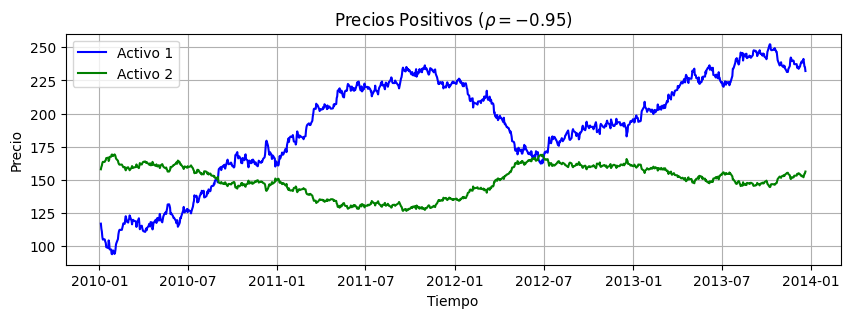

In [74]:
# Graficar precios_neg_df y mostrar coeficiente de correlación en el título
plt.figure(figsize=(10, 3))

corr_neg = retornos_neg_df.corr().iloc[0, 1]

plt.plot(precios_neg_df["Activo 1"], label="Activo 1", color="blue")
plt.plot(precios_neg_df["Activo 2"], label="Activo 2", color="green")

# plt.title(f"Precios Positivos (Correlación de los retornos: {corr_neg:.2f})")
plt.title(f"Precios Positivos ($\\rho={corr_neg:.2f}$)")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.show()

In [75]:
# Definimos los pesos de la cartera
w1 = 0.8
w2 = 0.2

# Calcular la media y la desviación estándar de los retornos
med_neg = retornos_neg_df.mean()
std_neg = retornos_neg_df.std()

print(med_neg)
print(std_neg)

# Calculamos la rentabilidad de la cartera
r1 = med_neg.iloc[0]
r2 = med_neg.iloc[1]

print("La rentabilidad de la cartera es:", calc_ret_cartera(w1, w2, r1, r2))

# Calculamos la volatilidad de la cartera
vol1 = std_neg.iloc[0]
vol2 = std_neg.iloc[1]

print(
    "La volatilidad de la cartera es:",
    calc_std_cartera(w1, w2, vol1, vol2, coef_corr_neg),
)

Activo 1    0.000686
Activo 2   -0.000011
dtype: float64
Activo 1    0.012476
Activo 2    0.006515
dtype: float64
La rentabilidad de la cartera es: 0.0005464026795538537
La volatilidad de la cartera es: 0.008677642777012613


In [76]:
# Cálculo de los retornos diarios de la cartera
pesos = np.array([w1, w2])  # (1, 2)

retornos_cartera = retornos_neg_df @ pesos.T  # (999, 2) @ (2, 1) = (999, 1)

print("La rentabilidad de la cartera es:", retornos_cartera.mean())
print("La volatilidad de la cartera es:", retornos_cartera.std())

La rentabilidad de la cartera es: 0.0005464026795538539
La volatilidad de la cartera es: 0.008747188300591333


In [77]:
# Generador de números aleatorios.
rng = np.random.default_rng(42)  # Fijar semilla para reproducibilidad

# Generar pesos aleatorios.
num_portfolios = 1000

weights = rng.random(
    size=(num_portfolios, 2)
)  # Distribución uniforme entre 0 y 1 -> [0.0, 1.0)
weights = weights / np.sum(
    weights, axis=1, keepdims=True
)  # Normalizar para que la suma sea 1

weights.shape

(1000, 2)

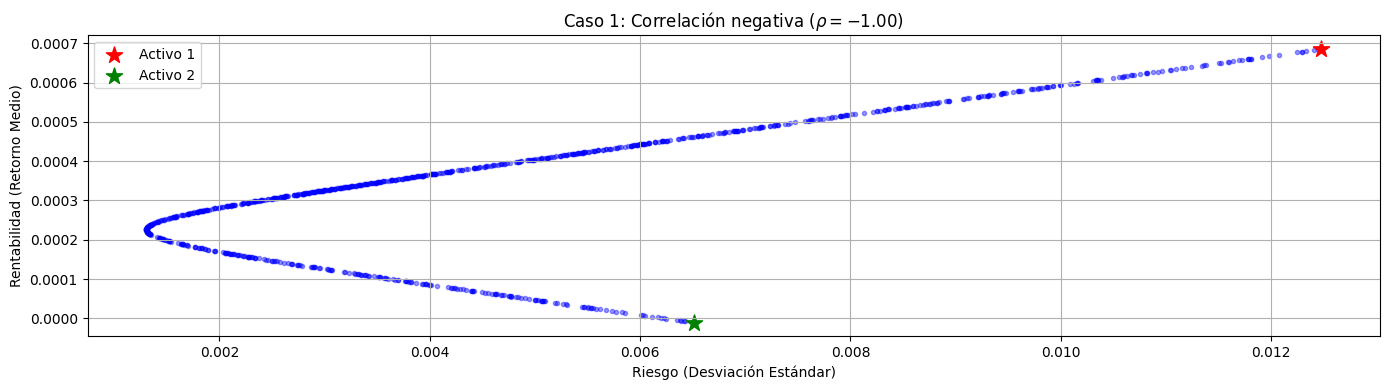

In [78]:
# Rentabilidad esperada y riesgo activo 1.
asset1_neg_mean, asset1_neg_std = asset_performance(retornos_neg_df["Activo 1"])
# Rentabilidad esperada y riesgo activo 2.
asset2_neg_mean, asset2_neg_std = asset_performance(retornos_neg_df["Activo 2"])
# Rentabilidades esperadas y riesgos de todas las carteras calculadas.
ret_neg_mean, ret_neg_std = portfolio_performance(
    weights, retornos_neg_df
)  # weights.shape = (1000, 2)

# Graficar
plot_on_axis(
    ret_neg_mean,
    ret_neg_std,
    asset1_neg_mean,
    asset1_neg_std,
    asset2_neg_mean,
    asset2_neg_std,
    "blue",
    ".",
    "Caso 1: Correlación negativa",
    coef_corr_neg,
)

---

### Caso 3: $\quad$    $-1\leq \rho_{12} \leq 1$

* Si $-1 \leq \rho_{12} \leq 1$ se dice que los activos tienen correlación **lineal no perfecta**.

    - Hay beneficios de diversificación, a mayor correlación negativa mayor beneficio.

    - La rentabilidad de la cartera es igual (recordad que no depende de las relaciones entre activos).
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$
        
    - La varianza de la cartera es igual a:
        - $\sigma²(\tilde R_p)= \underset{Activo 1} {\underbrace{w_1²\sigma²(\tilde R_1)}}+\underset{Activo 2} {\underbrace{w_2²\sigma²(\tilde R_2)}}+ \underset{Relacion\ entre\ activos} {\underbrace{2w_1w_2 \rho_{12} \sigma_1 \sigma_2}}$
        $$$$

    - La volatilidad de la cartera es igual a la raiz cuadrada de la varianza.
        - $\sigma(\tilde R_p)= \sqrt{w_1²\sigma²(\tilde R_1)+w_2²\sigma²(\tilde R_2)+ 2w_1w_2 \rho_{12} \sigma_1 \sigma_2} $

        

In [79]:
pesos_1 = np.linspace(0, 1, 100)
coef_corr_lst = [-1, -0.8, -0.5, 0, 0.5, 1]

# Definir un mapa de colores basado en coef_corr_lst
colors = ["#440154", "#3b528b", "#21918c", "#5ec962", "#3366CC", "#FF6633"]

# Ajustar el tamaño de la
layout_width = 1200  # Ancho en píxeles
layout_height = 700  # Altura en píxeles

# Crear la figura de plotly
fig = go.Figure()

for idx, coef_corr_i in enumerate(coef_corr_lst):
    ret_lst = []
    std_lst = []

    for w_1 in pesos_1:
        w_2 = 1 - w_1
        ret_p = calc_ret_cartera(w_1, w_2, ret1, ret2)
        std_p = calc_std_cartera(w_1, w_2, std1, std2, coef_corr_i)

        ret_lst.append(ret_p)
        std_lst.append(std_p)

    fig.add_trace(
        go.Scatter(
            x=std_lst,
            y=ret_lst,
            mode="markers",
            name=f"Corr {coef_corr_i}",
            marker=dict(color=colors[idx], size=8, opacity=0.5),
        )
    )

# Añadir puntos de activos individuales
fig.add_trace(
    go.Scatter(
        x=[std1],
        y=[ret1],
        mode="markers",
        marker=dict(color="red", size=20, symbol="star"),
        name="Activo 1",
    )
)
fig.add_trace(
    go.Scatter(
        x=[std2],
        y=[ret2],
        mode="markers",
        marker=dict(color="green", size=20, symbol="star"),
        name="Activo 2",
    )
)

# Configurar títulos y etiquetas

title_font_size = 20  # Tamaño de fuente del título

fig.update_layout(
    title="Cartera de dos activos variando el coeficiente de correlación",
    font=dict(size=title_font_size),
    title_x=0.5,
    # xanchor='center',
    xaxis_title="Volatilidad",
    yaxis_title="Retorno",
)

# Mostrar el gráfico
fig.show()

## 2. Cálculo de la cartera de mínima volatilidad

Vamos a calcular la cartera de mínima varianza:

* Partimos de la fórmula de la varianza de la cartera:

    - $\sigma^2_p= w_1^2\sigma^2_1+w_2^2\sigma^2_2+ 2w_1w_2 \rho_{12} \sigma_1 \sigma_2 $
    $$$$

* Sustituimos $w_2=1-w_1$, calculamos la derivada respecto de $w_1$ e igualamos a 0:

    - $\dfrac{\partial \sigma^2_p}{\partial w_1}= 2w_1\sigma^2_1 - 2(1-w_1)\sigma^2_2 + 2(1-2w_1) \rho_{12} \sigma_1 \sigma_2 = 0$
    $$$$

* Despejamos $w_1$:

    - $w_1 = \dfrac{\sigma_2²-\rho_{12} \sigma_1 \sigma_2}{\sigma_1²+\sigma_2²-2 \rho_{12} \sigma_1 \sigma_2}$
    


  



En el caso de dos activos con correlación $\rho_{12} = -1$:

* $w_1 = \dfrac{\sigma_2²+\sigma_1 \sigma_2}{\sigma_1²+\sigma_2²+2 \sigma_1 \sigma_2} = \dfrac{\sigma_2(\sigma_1+\sigma_2)}{(\sigma_1+\sigma_2)²} = \dfrac{\sigma_2}{\sigma_1+\sigma_2}$

Si lo aplicamos al ejemplo de la cartera con dos activos que hemos estado usando:

In [80]:
p1 = std2 / (std1 + std2)
p2 = 1 - p1
print(f"El peso del activo 1 es: {100*p1:.2f}%")
print(f"El peso del activo 2 es: {100*p2:.2f}%")

El peso del activo 1 es: 37.50%
El peso del activo 2 es: 62.50%


In [81]:
# calculamos la rentabilidad y volatilidad de la cartera con los nuevos pesos
print(f"El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %")
print(
    f"La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, coef_corr_neg):.2f} %"
)

El retorno de la cartera es:13.75 %
La volatilidad de la cartera es:0.00 %


**CONCLUSIONES**

Recordad que con los pesos iniciales y $\rho_{12}=1$ nos dió:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 19$%

Y hemos visto que con $\rho_{12}=-1$ y la fórmula de la cartera de mínima varianza nos ha dado:

* $E(\tilde R_p) = 13.75$%

* $\sigma_p = 0$%

Gracias a la **diversificación**, obtenemos casi la misma rentabilidad pero **sin riesgo**.

## EJERCICIO


Bájate la información de Telefónica y del Banco Santander de los años 2022 y 2023 y haz los siguientes apartados:

1- Genera 100 carteras modificando el peso en el activo 1 con saltos de 0.01 y dibuja la gráfica en el plano rentabilidad-riesgo de todas las carteras y de los dos activos.

2- Crea la cartera de volatilidad mínima e inclúyela en la gráfica que has generado antes.

3- Compara la rentabilidad, volatilidad, asimetría y kurtosis de los activos y de la cartera.